<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

Simon Gauthier, Laurent Emond, Thomas Charland et Anthony Drouin

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
%run tds2Danimation_h25.py
# ou
#%run tds3Dsim_h.py #si disponible : script sans la lente animation Vpython qui est en développement à la session h25!
# Remplacez "XX" par les deux derniers chiffres de l'année de votre session.
# N'hésitez pas à exécuter l'animation 2D ou la simulation 3D à l'extérieur du _Notebook_. Cette cellule vise à préciser que les questions qui suivent se basent sur ces scripts et doivent mener aux mêmes répomses autant en 2D qu'en 3D.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

**Réponse:** Pour faire ce calcul, nous allons extraire la variable $p$ défini dans le script `tds2Danimation_h25.py` qui est une liste de vecteurs de quantité de mouvement de toutes les sphères. Il suffit maintenant d'itérer sur cette list pour calculer la norme. Ensuite, il suffit de faire la moyenne de ces normes au carré. Numériquement, on trouvle que la moyenne de la norme au carré de la quantité de mouvement est de $5.60\times 10^{-47}$ kg $^2$ m $^2$ s $^{-2}$.

In [2]:
import numpy as np

momentum_square = np.zeros_like(p)

for i, particle_momentum in enumerate(p):
    px, py, pz = particle_momentum.x, particle_momentum.y, particle_momentum.z # composantes de la quantité de mouvement
    momentum_square[i] = px**2 + py**2 + pz**2

average_p2 = np.mean(momentum_square) # moyenne de p^2

print(f"La quantité de mouvement carrée moyenne des particules est de {average_p2:.2e} kg^2.m^2/s^2.")

La quantité de mouvement carrée moyenne des particules est de 5.60e-47 kg^2.m^2/s^2.



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

**Réponse:** On constate que la vitesse à la fin de la simulation est identique à celle au début de la simulation, c'est-à-dire de 300K. En fait, cette conclusion est peu suprenante puisque notre simulation ne contient pas de frottement et que les collisions sont élastiques. Ainsi, l'énergie cinétique totale du système est conservée et la température reste donc constante. Cette conclusion est en accord avec le principe d'équipartition de l'énergie.

In [3]:
gas_temperature = average_p2 / (mass*DIM*k) # réutilisation des variables de la simulation

print(f"La température du gaz est de {gas_temperature:.2f}K à la fin de la simulation.")

La température du gaz est de 300.00K à la fin de la simulation.


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

**Réponse:** Nous avons défini une fonction `followParticule` qui a justement pour objectif de suivre la position d'une particule quelconque du système. Cette fonction est implémentée dans le fichier `modifiedQuestion3_tds2Danimation_h25.py`. De plus, des commentaires ont été ajoutés pour faciliter la compréhension de cette fonction.

In [4]:
# Intégrée dans la boucle principale, la fonction suivra la progression d'une particule
# Lorsqu'une collision a lieu, les données accumulatedTime et accumulatedDistance seront sauvées dans une followParticuleList (variable globale)
# Cette variable globale sera celle qui persistera après la simulation complète
# On peut donc calculer la distance parcourue par une particule et le temps écoulé entre chaque collision.

# Ce code se trouve dans le fichier modifiedQuestion3_tds2Danimation_h25.py, qui est importé à la cellule suivante.

followParticuleList: list[list[float, float, float, float]] = []

def followParticule(
    hitlist: list, 
    accumulatedDistanceX: float, 
    accumulatedDistanceY: float, 
    accumulatedDistanceZ: float, 
    accumulatedTime: float, 
    previousCollision
    ) -> tuple:
    """
    Fonction qui permet de suivre une particule en particulier et d'accumuler sa distance parcourue et le temps écoulé
    entre chaque collision avec une autre particule.

    Args:
    hitlist (list): liste des collisions entre les particules
    accumulatedDistanceX (float): distance parcourue en x
    accumulatedDistanceY (float): distance parcourue en y
    accumulatedDistanceZ (float): distance parcourue en z
    accumulatedTime (float): temps écoulé
    previousCollision (list): collision précédente 

    Returns:
    
    """
    particuleNumber = 1 #numéro de la particule que nous suivrons
    vitesseParticule = p[particuleNumber]/mass # p/m = v
    
    accumulatedTime += dt # temps depuis la dernière itération
    accumulatedDistanceX += vitesseParticule.x*dt # incrément de distance dans les 3 directions
    accumulatedDistanceY += vitesseParticule.y*dt
    accumulatedDistanceZ += vitesseParticule.z*dt

    hit = False
    
    for ij in hitlist: # trouve quelle collision de la hitlist concerne la particule actuelle
        if ij[0] == particuleNumber or ij[1] == particuleNumber:
            hit = True
            currentCollision = ij
    
    if hit:
        if previousCollision != currentCollision: # évite de répéter une même collision
            followParticuleList.append([accumulatedDistanceX, accumulatedDistanceY, accumulatedDistanceZ, accumulatedTime])
            previousCollision = currentCollision
        return 0, 0, 0, 0, previousCollision # après une collision, réinitialiser les valeurs de distance et position
    else:
        return accumulatedDistanceX, accumulatedDistanceY, accumulatedDistanceZ, accumulatedTime, previousCollision

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_

**Réponse:** Tout d'abord, le script développé plus tôt permet de créer une liste, intitulée `followParticuleList`, qui contient les distances parcourues par la particule entre chaque collision. Ensuite, il est possible de calculer le libre parcours moyen en faisant la moyenne de cette liste. On trouve que le libre parcours moyen est de 0.084 m. Évidemment, à chaque simulation, celle valeur peut varier puisque le processus demeure stochastic. Tout de même, celà permet d'obtenir un ordre de grandeur. Le temps de collision $\tau$ est alors simplement le temps entre chaque collision, aussi contenu dans la liste `followParticuleList`. En moyenne, le temps de collision est de $9\times 10^{-5}$ s. Encore une fois, cette valeur peut varier d'une simulation à l'autre. Lors de notre simulation, la particule que nous suivions a effectuée 30 collisions pour un temps total de simulation de $2.7\times 10^{-3}$ s.

In [5]:
from modifiedQuestion3_tds2Danimation_h25 import followParticuleList

l_tot = 0
for ij in followParticuleList:
    l_tot += np.sqrt(ij[0]**2 + ij[1]**2 + ij[2]**2) # distance euclidienne

t_tot = 0
for ij in followParticuleList:
    t_tot += ij[3] # incrément de temps

l_moy = l_tot/len(followParticuleList) # distance moyenne entre les collisions
t_moy = t_tot/len(followParticuleList) # temps moyen entre les collisions

print(f"Le libre parcours moyen est de {l_moy:.3f} m")
print(f"Le temps de collision est de {t_moy:.3e} s")
print(f"Il y a eu {len(followParticuleList)} collisions lors de l'intervalle simulée! ({t_tot:.3e}s)")

<IPython.core.display.Javascript object>

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:59<00:00, 50.11it/s]


Le libre parcours moyen est de 0.084 m
Le temps de collision est de 9.000e-05 s
Il y a eu 30 collisions lors de l'intervalle simulée! (2.700e-03s)


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

**Réponse:** On s'intéresse maintenant à trouver la vitesse moyenne sous la forme vectorielle, soit $\langle\vec{v}\rangle$. En fait, on sait que le vecteur de vitesse peut être décomposé en ses composantes telles que

$$\vec{v}=v_x\hat{x}+v_y\hat{y}+v_z\hat{z}$$

C'est donc que le vecteur de vitesse moyen peut être réécrit sous la forme

$$\langle\vec{v}\rangle=\langle v_x\rangle\hat{x}+\langle v_y\rangle\hat{y}+\langle v_z\rangle\hat{z}$$ 

Il suffit donc de sommer la vitesse de chaque composante pour chaque collision et de diviser par le nombre de collisions. Dans notre précédente simulation, on obtient que

$$\langle\vec{v}\rangle=47.59\hat{x}+111.34\hat{y}+0.0\hat{z}\quad\text{m/s}$$

Toutefois, on remarque que $\langle v_x\rangle \to 0$ et $\langle v_y\rangle \to 0$ lorsque le temps de simulation augmente. Ce qui est attendu puisque la particule est soumise à des collisions élastiques et que la vitesse est donc aléatoire. Ainsi, la vitesse moyenne (sous forme vectorielle!) tend vers 0. 

In [6]:
vitesseEntreCollisionsList = []
for ij in followParticuleList:
    t = ij[3]
    v_x = ij[0]/t
    v_y = ij[1]/t
    v_z = ij[2]/t
    vitesseEntreCollisionsList.append([v_x, v_y, v_z])

v_average = [0, 0, 0]
number_of_collision = len(followParticuleList)
for v in vitesseEntreCollisionsList:
    v_x, v_y, v_z = v # composantes de vitesses entre chaque collision
    v_average[0] += v_x / number_of_collision
    v_average[1] += v_y / number_of_collision
    v_average[2] += v_z / number_of_collision

print(f"La vitesse moyenne de la particule est de {v_average[0]:.2f}x + {v_average[1]:.2f}y + {v_average[2]:.2f}z m/s")

La vitesse moyenne de la particule est de 47.59x + 111.34y + 0.00z m/s


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

**Réponse:** On calcul maintenant les valeurs demandées $||\vec{v}||, v^2$ et $v_x^2$ et pour chaque valeur, on calcul aussi la moyenne, le mode, la médiane et la moyenne quadratique. Le tout est affiché sur un histogramme où l'axe des $x$ est placé en échelle logarithmique pour faciliter la lecture. L'ensemble des valeurs demandées sont affichées à l'aide de la même axe logarithmique.

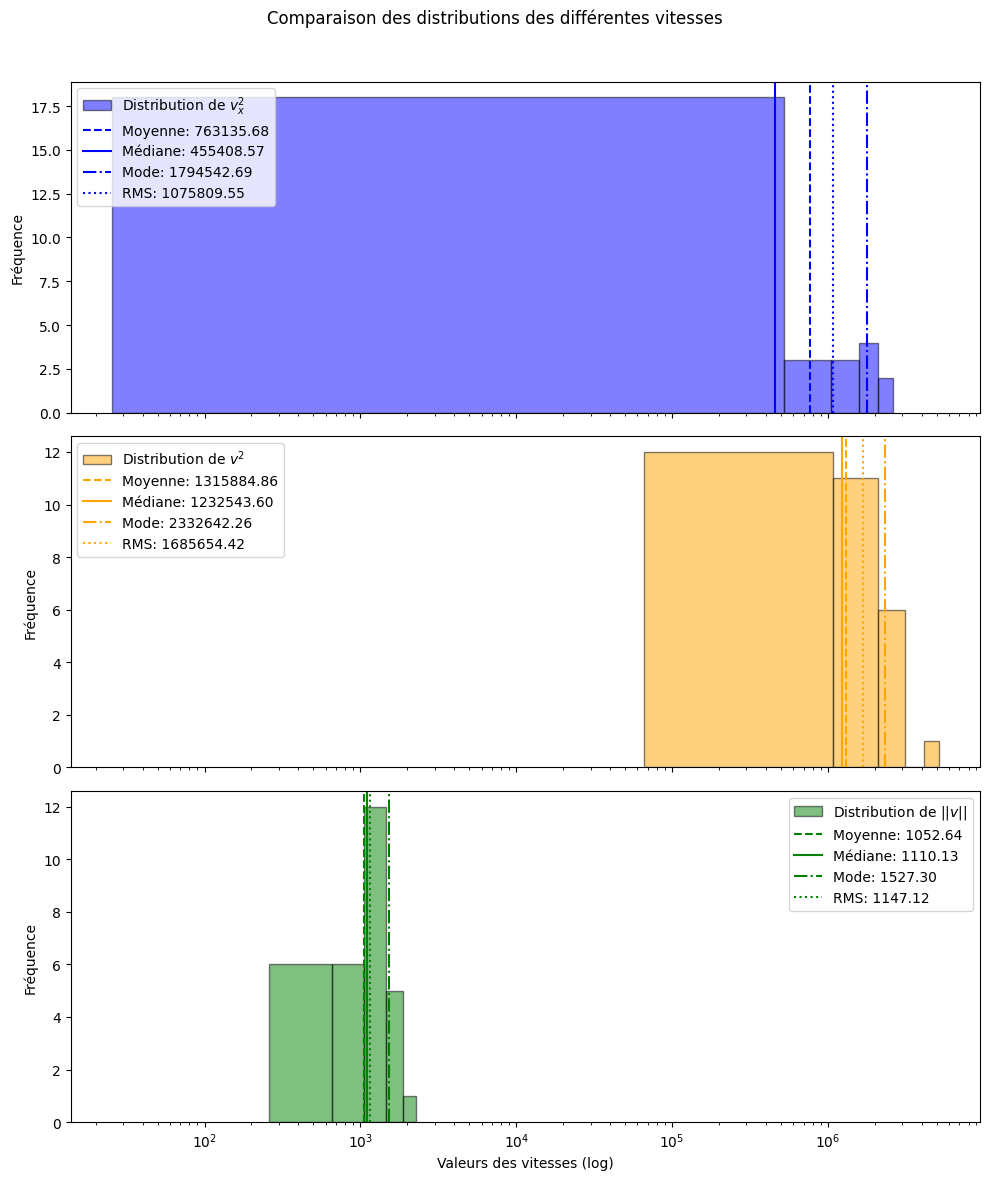

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

carres_x = []
carres_vitesse = []
normes_vitesse = []

for ij in followParticuleList:
    dt = ij[3]
    dx = ij[0]
    dy = ij[1]
    dz = ij[2]
    carre_x = (dx/dt)**2
    carre_vitesse = ((dx/dt)**2 + (dy/dt)**2 + (dz/dt)**2)
    norme_vitesse = np.sqrt(carre_vitesse)

    carres_x.append(carre_x)
    carres_vitesse.append(carre_vitesse)
    normes_vitesse.append(norme_vitesse)

carres_x = np.array(carres_x)
carres_vitesse = np.array(carres_vitesse)
normes_vitesse = np.array(normes_vitesse)

# Calcul des statistiques
stats_dict = dict()
labels = ["$v_x^2$", "$v^2$", "$||v||$"]
data_list = [carres_x, carres_vitesse, normes_vitesse]
colors = ['blue', 'orange', 'green']

for label, data in zip(labels, data_list):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True)[0][0]
    rms = np.sqrt(np.mean(data**2))
    stats_dict[label] = (mean, median, mode, rms)

# Définir les sous-graphes avec un axe des X partagé
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig.suptitle("Comparaison des distributions des différentes vitesses")

for ax, data, label, color in zip(axs, data_list, labels, colors):
    ax.hist(data, bins=round(np.sqrt(len(data))), alpha=0.5, color=color, edgecolor='black', label=f"Distribution de {label}")
    mean, median, mode, rms = stats_dict[label]
    
    # Ajouter les lignes des statistiques
    ax.axvline(mean, color=color, linestyle='--', label=f"Moyenne: {mean:.2f}")
    ax.axvline(median, color=color, linestyle='-', label=f"Médiane: {median:.2f}")
    ax.axvline(mode, color=color, linestyle='-.', label=f"Mode: {mode:.2f}")
    ax.axvline(rms, color=color, linestyle=':', label=f"RMS: {rms:.2f}")
    ax.set_xscale("log")
    ax.set_ylabel("Fréquence")
    ax.legend(loc='best')

axs[-1].set_xlabel("Valeurs des vitesses (log)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

**Réponse**
**a)**

Ici, on démontre que la norme de la vitesse suit une distribution normale selon le théorème centrale limite. Pour cette démonstration numérique, nous venons sélectionner 1000 échantillons de 50 normes de vitesse moyennés provenant du numéro précédent. Ensuite, le résultat obtenu est mis sous forme d'un histogramme. On remarque que la distribution est bien normale et que le théorème centrale limite est donc respecté en surimposant une courbe gaussienne sur l'histogramme ayant la moyenne et l'écart-type de la distribution.

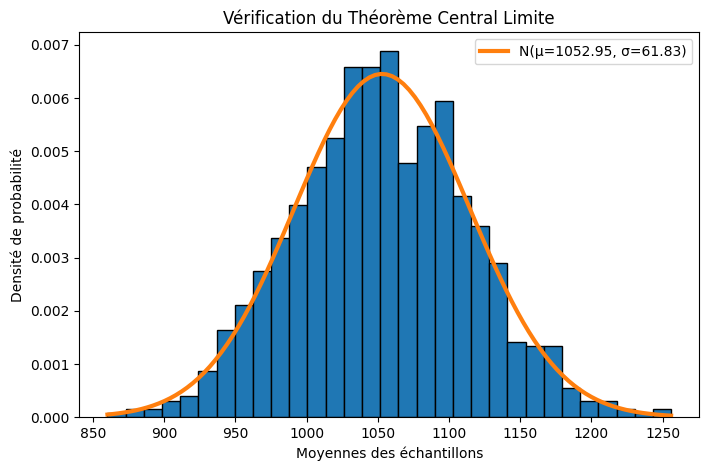

In [8]:
### (a)
n_samples_to_avg = 50
n_means = 1000

# On moyenne n_means groupe de n_samples_to_avg échantillons de norme de vitesse. Puisque n_means est grand, on tombe sur une dist. gaussienne.
sample_means = [np.mean(np.random.choice(normes_vitesse, size=n_samples_to_avg, replace=True)) for _ in range(n_means)]

plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=int(np.sqrt(n_means)), density=True, alpha=1, color='tab:blue', edgecolor='black')

mu, sigma = np.mean(sample_means), np.std(sample_means) # paramètres de la gaussienne
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), '-', c="tab:orange", lw=3, label=f"N(μ={mu:.2f}, σ={sigma:.2f})") # fit gaussien
plt.title("Vérification du Théorème Central Limite")
plt.xlabel("Moyennes des échantillons")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

**b)**

On prouve que le système est ergodique est démontrant que les moyennes temporelles sont égales (ou proche) aux moyennes d'ensemble.

Considérons par exemple l'énergie cinétique $E_{cin}$ que nous pouvons trouver à partir de la simulation numérique et à partir de la distribution de Maxwell-Boltzmann, ce qui sera notre moyenne d'ensemble.

**Moyenne statistique**

$$\langle E_{cin}\rangle_t = \frac{1}{2}m\langle v^2\rangle$$

On trouve $\langle v^2\rangle$ avec

$$\langle v^2\rangle = \frac{1}{N}\sum_{i=1}^{N}v_i^2$$

**Moyenne d'ensemble**

On part de la distribution de Maxwell-Boltzmann pour l'énergie cinétique. À partir de la question 2, et en considérant une dimension de deux $\text{DIM}=2$, on obtient

$$\langle E_{cin} \rangle_{\mu} = k_b T$$

où $T$ est la température et celle-ci est connue. En effet, dans le script fourni dans le cadre du devoir, nous avons posé que $T=300$ K.

Maintenant, il suffit de confirmer que 

$$\langle E_{cin}\rangle_t \approx \langle E_{cin}\rangle_{\mu}$$

Numériquement, on trouve que la moyenne expérimentale, ou moyenne temporelle $\langle E_{cin}\rangle_{t}=4.3863\times 10^{-21}$ J alors que la moyenne dite théorique, ou moyenne d'ensemble, notée $\langle E_{cin}\rangle_{\mu}=4.2000\times 10^{-21}$ J. On constate donc que les deux moyennes sont très proches, ce qui confirme que le système est ergodique. La légère différence entre les deux ensembles est due à la nature stochastique du système. Somme tout, on considère que le système est ergodique car les moyennes temporelles sont du même ordre de grandeur que les moyennes d'ensemble.

In [9]:
### (b) 
k = 1.4E-23 
norme_v_squared = []
for ij in followParticuleList:
    t = ij[3]
    v_x = ij[0]/t
    v_y = ij[1]/t
    v_z = ij[2]/t
    norme_v_squared.append(v_x**2 + v_y**2 + v_z**2)

v_squared_average_experimental = np.mean(norme_v_squared)

kinetics_energy_average_experimental = (1/2) * mass * v_squared_average_experimental

T = 300

kinetics_energy_analytical = k * 300

print(f"Moyenne expérimentale : {kinetics_energy_average_experimental:.4e} J")
print(f"Moyenne théorique : {kinetics_energy_analytical:.4e} J")

Moyenne expérimentale : 4.3863e-21 J
Moyenne théorique : 4.2000e-21 J


# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.